### LAB 4 : House Price Prediction using LR with Regularization

In [ ]:
#SWETHA JENIFER_S_225229142_21-1-23

### Step 1 : Import Dataset

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r'Ames_House_Sales_Cropped.csv')
data

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856.0,854.0,0.0,3,706.0,0.0,1,0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1Fam,Y,1262.0,0.0,0.0,3,978.0,0.0,0,1,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,1Fam,Y,920.0,866.0,0.0,3,486.0,0.0,1,0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,1Fam,Y,961.0,756.0,0.0,3,216.0,0.0,1,0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1Fam,Y,1145.0,1053.0,0.0,4,655.0,0.0,1,0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,1Fam,Y,953.0,694.0,0.0,3,0.0,0.0,0,0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,1Fam,Y,2073.0,0.0,0.0,3,790.0,163.0,1,0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1Fam,Y,1188.0,1152.0,0.0,4,275.0,0.0,0,0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1Fam,Y,1078.0,0.0,0.0,2,49.0,1029.0,1,0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


In [3]:
data.head()

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856.0,854.0,0.0,3,706.0,0.0,1,0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1Fam,Y,1262.0,0.0,0.0,3,978.0,0.0,0,1,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,1Fam,Y,920.0,866.0,0.0,3,486.0,0.0,1,0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,1Fam,Y,961.0,756.0,0.0,3,216.0,0.0,1,0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1Fam,Y,1145.0,1053.0,0.0,4,655.0,0.0,1,0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0


In [4]:
data.shape

(1379, 39)

In [5]:
data.columns

Index(['BldgType', 'CentralAir', '1stFlrSF', '2ndFlrSF', '3SsnPorch',
       'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
data.dtypes

BldgType          object
CentralAir        object
1stFlrSF         float64
2ndFlrSF         float64
3SsnPorch        float64
BedroomAbvGr       int64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtUnfSF        float64
EnclosedPorch    float64
Fireplaces         int64
FullBath           int64
GarageArea       float64
GarageCars         int64
GarageYrBlt      float64
GrLivArea        float64
HalfBath           int64
KitchenAbvGr       int64
LotArea          float64
LotFrontage      float64
LowQualFinSF     float64
MSSubClass         int64
MasVnrArea       float64
MiscVal          float64
MoSold             int64
OpenPorchSF      float64
OverallCond        int64
OverallQual        int64
PoolArea         float64
ScreenPorch      float64
TotRmsAbvGrd       int64
TotalBsmtSF      float64
WoodDeckSF       float64
YearBuilt          int64
YearRemodAdd       int64
YrSold             int64
SalePrice        float64
dtype: object

In [7]:
data.info

<bound method DataFrame.info of      BldgType CentralAir  1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  \
0        1Fam          Y     856.0     854.0        0.0             3   
1        1Fam          Y    1262.0       0.0        0.0             3   
2        1Fam          Y     920.0     866.0        0.0             3   
3        1Fam          Y     961.0     756.0        0.0             3   
4        1Fam          Y    1145.0    1053.0        0.0             4   
...       ...        ...       ...       ...        ...           ...   
1374     1Fam          Y     953.0     694.0        0.0             3   
1375     1Fam          Y    2073.0       0.0        0.0             3   
1376     1Fam          Y    1188.0    1152.0        0.0             4   
1377     1Fam          Y    1078.0       0.0        0.0             2   
1378     1Fam          Y    1256.0       0.0        0.0             3   

      BsmtFinSF1  BsmtFinSF2  BsmtFullBath  BsmtHalfBath  ...  OverallQual  \
0          70

In [8]:
data.CentralAir.value_counts()

Y    1310
N      69
Name: CentralAir, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BldgType       1379 non-null   object 
 1   CentralAir     1379 non-null   object 
 2   1stFlrSF       1379 non-null   float64
 3   2ndFlrSF       1379 non-null   float64
 4   3SsnPorch      1379 non-null   float64
 5   BedroomAbvGr   1379 non-null   int64  
 6   BsmtFinSF1     1379 non-null   float64
 7   BsmtFinSF2     1379 non-null   float64
 8   BsmtFullBath   1379 non-null   int64  
 9   BsmtHalfBath   1379 non-null   int64  
 10  BsmtUnfSF      1379 non-null   float64
 11  EnclosedPorch  1379 non-null   float64
 12  Fireplaces     1379 non-null   int64  
 13  FullBath       1379 non-null   int64  
 14  GarageArea     1379 non-null   float64
 15  GarageCars     1379 non-null   int64  
 16  GarageYrBlt    1379 non-null   float64
 17  GrLivArea      1379 non-null   float64
 18  HalfBath

### Step 2 : Predict Sale Price without Categorical features

In [10]:
df=data.drop("BldgType",axis=1)
df

,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,Y,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,Y,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,Y,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,Y,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,Y,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,Y,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,Y,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,Y,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,Y,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


In [11]:
df2=df.drop("CentralAir",axis=1)
df2

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


In [12]:
p=data.pop("BldgType")
p

0       1Fam
1       1Fam
2       1Fam
3       1Fam
4       1Fam
        ... 
1374    1Fam
1375    1Fam
1376    1Fam
1377    1Fam
1378    1Fam
Name: BldgType, Length: 1379, dtype: object

In [13]:
p1=data.pop("CentralAir")
p1

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1374    Y
1375    Y
1376    Y
1377    Y
1378    Y
Name: CentralAir, Length: 1379, dtype: object

In [14]:
data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


In [15]:
y=data[["SalePrice"]]
y

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1374,175000.0
1375,210000.0
1376,266500.0
1377,142125.0


In [16]:
X=df2.drop("SalePrice",axis=1)
X

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,5,6,0.0,0.0,7,953.0,0.0,1999,2000,2007
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,9,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,6,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1193,1337.0,0.0,0.0,2,266.0,0.0,1,0,1139.0,0.0,...,5,6,0.0,0.0,5,1405.0,144.0,1998,1999,2008
910,1800.0,0.0,0.0,2,0.0,0.0,0,0,1800.0,0.0,...,5,9,0.0,0.0,7,1800.0,288.0,2007,2007,2009
1068,1328.0,653.0,0.0,4,622.0,0.0,1,0,500.0,0.0,...,3,4,0.0,0.0,7,1122.0,431.0,1928,1950,2009
1196,2018.0,0.0,0.0,3,0.0,0.0,0,0,2002.0,0.0,...,5,9,0.0,0.0,10,2002.0,144.0,2008,2009,2010
1102,959.0,712.0,0.0,3,786.0,0.0,1,0,173.0,0.0,...,5,6,0.0,0.0,7,959.0,0.0,2000,2000,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,855.0,601.0,0.0,3,311.0,0.0,0,0,544.0,0.0,...,5,6,0.0,0.0,7,855.0,26.0,1978,1978,2010
1130,815.0,875.0,0.0,3,0.0,0.0,0,0,815.0,330.0,...,6,7,0.0,0.0,7,815.0,0.0,1916,1950,2006
1294,1661.0,0.0,0.0,3,831.0,0.0,1,0,161.0,0.0,...,6,6,0.0,178.0,8,992.0,0.0,1955,1996,2008
860,742.0,742.0,0.0,3,0.0,0.0,0,0,742.0,0.0,...,5,6,0.0,0.0,8,742.0,36.0,2005,2005,2009


In [20]:
X_test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
599,1518.0,0.0,0.0,1,1218.0,0.0,0,0,300.0,0.0,...,5,8,0.0,0.0,6,1518.0,185.0,2003,2004,2008
881,925.0,0.0,0.0,2,338.0,466.0,0,1,121.0,0.0,...,6,5,0.0,0.0,5,925.0,0.0,1965,1965,2009
634,1095.0,679.0,0.0,4,0.0,0.0,1,0,1095.0,90.0,...,2,4,0.0,0.0,8,1095.0,0.0,1900,1950,2006
425,888.0,868.0,0.0,3,742.0,0.0,1,0,130.0,0.0,...,5,6,0.0,0.0,7,872.0,144.0,1996,1997,2007
906,1337.0,0.0,0.0,3,699.0,0.0,1,0,638.0,0.0,...,5,7,0.0,0.0,6,1337.0,0.0,2003,2003,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,1142.0,793.0,0.0,3,0.0,0.0,0,0,793.0,252.0,...,7,7,0.0,0.0,7,793.0,0.0,1976,1976,2007
561,684.0,684.0,0.0,3,0.0,0.0,0,0,684.0,0.0,...,7,6,0.0,0.0,7,684.0,0.0,1910,1993,2006
529,1163.0,511.0,0.0,4,0.0,0.0,0,0,1163.0,0.0,...,7,6,0.0,144.0,8,1163.0,72.0,1918,1950,2008
567,927.0,988.0,0.0,3,789.0,0.0,1,0,119.0,0.0,...,5,8,0.0,0.0,8,908.0,120.0,1992,1992,2006


In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=lr.predict(X_test)
y_pred

array([[257434.93050742],
       [111083.73474761],
       [100018.05832319],
       [204028.53821311],
       [207319.25418313],
       [ 38036.30928929],
       [234153.38582868],
       [205076.12689611],
       [187014.12655251],
       [235636.78799033],
       [100976.50943764],
       [304119.53646977],
       [101769.6460072 ],
       [288758.46001596],
       [204767.89338331],
       [145002.47279618],
       [248322.97436851],
       [151533.68038632],
       [209697.39458718],
       [278312.23574137],
       [ 93329.85601476],
       [153784.14868377],
       [163237.87451144],
       [241495.91212884],
       [372429.9472694 ],
       [221672.07367598],
       [119658.75685739],
       [100039.78137073],
       [319435.02892083],
       [172088.64665031],
       [258772.64470113],
       [199597.36129639],
       [156349.69283231],
       [142311.22500103],
       [204807.33161329],
       [379608.17785445],
       [124176.23377555],
       [141127.25006141],
       [2738

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mse_In=mean_squared_error(y_test,y_pred)
mse_In

1474827325.596962

### Step 3 : Create Scatter Plot

In [25]:
import matplotlib.pyplot as plt

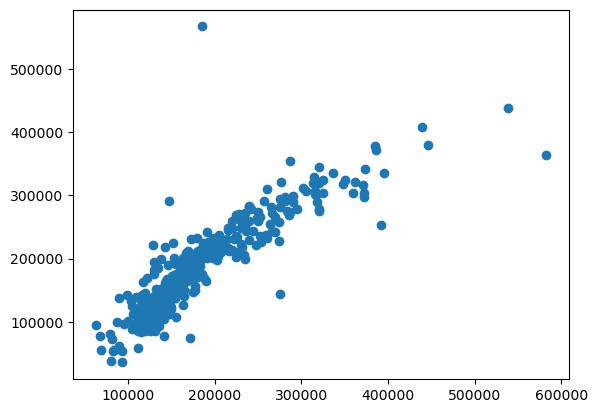

In [26]:
plt.scatter(y_test,y_pred)

### Step 4 : Encode Categorical Columns

In [27]:
gd=pd.get_dummies(df)
gd

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice,CentralAir_N,CentralAir_Y
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,8,856.0,0.0,2003,2003,2008,208500.0,0,1
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,6,1262.0,298.0,1976,1976,2007,181500.0,0,1
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,6,920.0,0.0,2001,2002,2008,223500.0,0,1
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,7,756.0,0.0,1915,1970,2006,140000.0,0,1
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,9,1145.0,192.0,2000,2000,2008,250000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0.0,7,953.0,0.0,1999,2000,2007,175000.0,0,1
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0.0,7,1542.0,349.0,1978,1988,2010,210000.0,0,1
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0.0,9,1152.0,0.0,1941,2006,2010,266500.0,0,1
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0.0,5,1078.0,366.0,1950,1996,2010,142125.0,0,1


### Step 5 : Predict Sale Price with Categorical features

In [28]:
x=gd.drop("SalePrice",axis=1)
x

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,CentralAir_N,CentralAir_Y
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,0.0,8,856.0,0.0,2003,2003,2008,0,1
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,0.0,6,1262.0,298.0,1976,1976,2007,0,1
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,0.0,6,920.0,0.0,2001,2002,2008,0,1
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,0.0,7,756.0,0.0,1915,1970,2006,0,1
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,0.0,9,1145.0,192.0,2000,2000,2008,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0.0,0.0,7,953.0,0.0,1999,2000,2007,0,1
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0.0,0.0,7,1542.0,349.0,1978,1988,2010,0,1
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0.0,0.0,9,1152.0,0.0,1941,2006,2010,0,1
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0.0,0.0,5,1078.0,366.0,1950,1996,2010,0,1


In [29]:
Y=gd.pop('SalePrice')

In [30]:
Y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1374    175000.0
1375    210000.0
1376    266500.0
1377    142125.0
1378    147500.0
Name: SalePrice, Length: 1379, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(x,Y,test_size=0.25,random_state=42)

In [33]:
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,CentralAir_N,CentralAir_Y
1193,1337.0,0.0,0.0,2,266.0,0.0,1,0,1139.0,0.0,...,0.0,0.0,5,1405.0,144.0,1998,1999,2008,0,1
910,1800.0,0.0,0.0,2,0.0,0.0,0,0,1800.0,0.0,...,0.0,0.0,7,1800.0,288.0,2007,2007,2009,0,1
1068,1328.0,653.0,0.0,4,622.0,0.0,1,0,500.0,0.0,...,0.0,0.0,7,1122.0,431.0,1928,1950,2009,0,1
1196,2018.0,0.0,0.0,3,0.0,0.0,0,0,2002.0,0.0,...,0.0,0.0,10,2002.0,144.0,2008,2009,2010,0,1
1102,959.0,712.0,0.0,3,786.0,0.0,1,0,173.0,0.0,...,0.0,0.0,7,959.0,0.0,2000,2000,2006,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,855.0,601.0,0.0,3,311.0,0.0,0,0,544.0,0.0,...,0.0,0.0,7,855.0,26.0,1978,1978,2010,0,1
1130,815.0,875.0,0.0,3,0.0,0.0,0,0,815.0,330.0,...,0.0,0.0,7,815.0,0.0,1916,1950,2006,0,1
1294,1661.0,0.0,0.0,3,831.0,0.0,1,0,161.0,0.0,...,0.0,178.0,8,992.0,0.0,1955,1996,2008,0,1
860,742.0,742.0,0.0,3,0.0,0.0,0,0,742.0,0.0,...,0.0,0.0,8,742.0,36.0,2005,2005,2009,0,1


In [34]:
from sklearn.linear_model import LinearRegression
lrr=LinearRegression()
lrr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred=lrr.predict(X_test)
y_pred

array([257335.70006081, 110874.86923399, 102030.23199645, 203810.90312824,
       207483.24806594,  42212.75743247, 234280.44650341, 205672.50051971,
       186278.85766251, 234095.76559429, 100749.5543281 , 303151.19469147,
       101416.85324799, 289134.34874569, 204622.14962909, 144125.59534163,
       248672.44116543, 151327.54761816, 209923.69905603, 278332.4153386 ,
        92437.05947671, 153368.70559331, 163347.72617271, 241763.42050298,
       372545.1015568 , 220606.10539589, 118571.34158758,  99792.70721998,
       319574.68090215, 172462.69803717, 258594.10016241, 199314.67396256,
       160816.17421115, 142048.73733357, 204308.92322955, 379621.05611974,
       122596.82381487, 140080.77925219, 274173.50644953, 212534.56183018,
       169526.18279984, 123222.23772218, 199622.34002269, 377498.8811548 ,
       147008.64960389, 284099.6780764 , 106018.68433947, 222067.43202866,
        87265.63294037, 295295.75316698, 125047.07843532,  57910.53539268,
       133650.09128803, 1

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
MSE=mean_squared_error(y_test,y_pred)
MSE

1472346697.5179152

### Step 6 : Normalize using StandardScaler and Predict Sale Price

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()

In [40]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.39851037, -0.79290427, -0.11340519, ...,  0.11447318,
        -0.22777619,  0.22777619],
       [ 1.57467708, -0.79290427, -0.11340519, ...,  0.8683921 ,
        -0.22777619,  0.22777619],
       [ 0.37564751,  0.70143387, -0.11340519, ...,  0.8683921 ,
        -0.22777619,  0.22777619],
       ...,
       [ 1.22157303, -0.79290427, -0.11340519, ...,  0.11447318,
        -0.22777619,  0.22777619],
       [-1.11297817,  0.90510323, -0.11340519, ...,  0.8683921 ,
        -0.22777619,  0.22777619],
       [ 0.11145456, -0.79290427, -0.11340519, ...,  0.8683921 ,
        -0.22777619,  0.22777619]])

In [41]:
scaled_X_train.shape

(1034, 38)

In [42]:
scaled_X_test=scaler.transform(X_test)
scaled_X_test

array([[ 0.85830772, -0.79290427, -0.11340519, ...,  0.11447318,
        -0.22777619,  0.22777619],
       [-0.64810018, -0.79290427, -0.11340519, ...,  0.8683921 ,
        -0.22777619,  0.22777619],
       [-0.21624632,  0.76093278, -0.11340519, ..., -1.39336465,
         4.39027446, -4.39027446],
       ...,
       [-0.04350477,  0.37647826, -0.11340519, ...,  0.11447318,
        -0.22777619,  0.22777619],
       [-0.64301955,  1.46805451, -0.11340519, ..., -1.39336465,
        -0.22777619,  0.22777619],
       [-0.29499614,  0.81585486, -0.11340519, ..., -1.39336465,
        -0.22777619,  0.22777619]])

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
Scaler=StandardScaler()
scaled_X_train=Scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.39851037, -0.79290427, -0.11340519, ...,  0.11447318,
        -0.22777619,  0.22777619],
       [ 1.57467708, -0.79290427, -0.11340519, ...,  0.8683921 ,
        -0.22777619,  0.22777619],
       [ 0.37564751,  0.70143387, -0.11340519, ...,  0.8683921 ,
        -0.22777619,  0.22777619],
       ...,
       [ 1.22157303, -0.79290427, -0.11340519, ...,  0.11447318,
        -0.22777619,  0.22777619],
       [-1.11297817,  0.90510323, -0.11340519, ...,  0.8683921 ,
        -0.22777619,  0.22777619],
       [ 0.11145456, -0.79290427, -0.11340519, ...,  0.8683921 ,
        -0.22777619,  0.22777619]])

In [45]:
scaled_X_test=Scaler.transform(X_test)
scaled_X_test

array([[ 0.85830772, -0.79290427, -0.11340519, ...,  0.11447318,
        -0.22777619,  0.22777619],
       [-0.64810018, -0.79290427, -0.11340519, ...,  0.8683921 ,
        -0.22777619,  0.22777619],
       [-0.21624632,  0.76093278, -0.11340519, ..., -1.39336465,
         4.39027446, -4.39027446],
       ...,
       [-0.04350477,  0.37647826, -0.11340519, ...,  0.11447318,
        -0.22777619,  0.22777619],
       [-0.64301955,  1.46805451, -0.11340519, ..., -1.39336465,
        -0.22777619,  0.22777619],
       [-0.29499614,  0.81585486, -0.11340519, ..., -1.39336465,
        -0.22777619,  0.22777619]])

In [46]:
model1=LinearRegression()
model1.fit(scaled_X_train,y_train)
sy_pred=model1.predict(scaled_X_test)
sy_pred

array([257335.70006079, 110874.86923392, 102030.23199608, 203810.90312837,
       207483.24806589,  42212.75743268, 234280.44650336, 205672.50051949,
       186278.85766227, 234095.76559429, 100749.55432845, 303151.19469193,
       101416.8532478 , 289134.34874559, 204622.14962902, 144125.5953416 ,
       248672.44116556, 151327.54761831, 209923.69905592, 278332.41533923,
        92437.05947649, 153368.70559335, 163347.7261726 , 241763.42050309,
       372545.10155694, 220606.1053961 , 118571.34158743,  99792.70721984,
       319574.68090213, 172462.69803731, 258594.10016254, 199314.67396263,
       160816.17421064, 142048.7373335 , 204308.92322941, 379621.05611975,
       122596.82381485, 140080.77925232, 274173.50644996, 212534.56183008,
       169526.18279981, 123222.23772213, 199622.34002308, 377498.88115508,
       147008.64960396, 284099.6780763 , 106018.68433925, 222067.43202863,
        87265.63294041, 295295.75316692, 125047.07843544,  57910.53539287,
       133650.09128776, 1

In [47]:
mse_In1=mean_squared_error(y_test,sy_pred)
mse_In1
print("mean square error using standard scalar:",mse_In1)

mean square error using standard scalar: 1472346697.5197487


### Step 7 : Normalize using MinMaxscaler and Predict Sale Price

In [48]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler=MinMaxScaler()

In [49]:
mmX_train=mm_scaler.fit_transform(X_train)
mmX_train

array([[0.21133051, 0.        , 0.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.32016925, 0.        , 0.        , ..., 0.75      , 0.        ,
        1.        ],
       [0.20921486, 0.31622276, 0.        , ..., 0.75      , 0.        ,
        1.        ],
       ...,
       [0.28749412, 0.        , 0.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.07146215, 0.35932203, 0.        , ..., 0.75      , 0.        ,
        1.        ],
       [0.18476728, 0.        , 0.        , ..., 0.75      , 0.        ,
        1.        ]])

In [50]:
mmX_test=mm_scaler.transform(X_test)
mmX_test

array([[0.2538787 , 0.        , 0.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.11448049, 0.        , 0.        , ..., 0.75      , 0.        ,
        1.        ],
       [0.15444288, 0.32881356, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.17042783, 0.24745763, 0.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.11495063, 0.47845036, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.14715562, 0.34043584, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [51]:
model3=LinearRegression()
model3.fit(mmX_train,y_train)

LinearRegression()

In [52]:
mms_y_pred=model3.predict(mmX_test)
mms_y_pred

array([257335.70006079, 110874.86923392, 102030.23199608, 203810.90312837,
       207483.24806589,  42212.75743267, 234280.44650336, 205672.50051949,
       186278.85766227, 234095.76559429, 100749.55432845, 303151.19469193,
       101416.8532478 , 289134.34874559, 204622.14962902, 144125.5953416 ,
       248672.44116556, 151327.54761831, 209923.69905592, 278332.41533923,
        92437.05947649, 153368.70559335, 163347.7261726 , 241763.42050309,
       372545.10155694, 220606.1053961 , 118571.34158743,  99792.70721984,
       319574.68090213, 172462.69803731, 258594.10016254, 199314.67396263,
       160816.17421064, 142048.7373335 , 204308.92322941, 379621.05611975,
       122596.82381485, 140080.77925232, 274173.50644996, 212534.56183008,
       169526.18279981, 123222.23772213, 199622.34002308, 377498.88115508,
       147008.64960396, 284099.6780763 , 106018.68433925, 222067.43202863,
        87265.63294041, 295295.75316692, 125047.07843544,  57910.53539287,
       133650.09128776, 1

In [53]:
mmMSE=mean_squared_error(y_test,mms_y_pred)

In [54]:
print("mean sqaure error using min max scaler:",mmMSE)

mean sqaure error using min max scaler: 1472346697.5197484


### Step 8 : Predict using Lasso Regression

In [55]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(scaled_X_train, y_train)
sgd_y_pred=sgd.predict(scaled_X_test)
print("Predictions of scaled data using SGDRegressor:", sgd_y_pred)

Predictions of scaled data using SGDRegressor: [253091.299544   106565.50790839 104626.34102169 207661.4859856
 206917.09714995  36046.21934483 233739.70552908 202676.34798682
 187005.31028438 236024.5747362   99641.82325198 310025.08756198
  97266.18295953 290131.00236081 201761.79806543 143377.09086352
 252906.25504753 149082.67235302 207967.56459298 283488.49207465
  93737.93134751 155078.32912489 162405.90860861 246032.3424718
 372018.34446619 226060.1727652  119910.34753638  95323.95479328
 326542.3528735  173086.7915374  259073.6708499  201882.96642915
 156780.56559503 139694.6413453  204877.57748786 385235.31699662
 119483.14075924 144281.15632414 280531.57210375 207498.59446172
 171786.50200063 121507.06770225 203271.23182257 378865.011793
 145817.04260718 288154.58954383 101957.45826385 224654.47652901
  81832.96194231 297235.9371943  123023.02050467  52948.28517939
 139314.19814344 173338.65222782 217364.82446022 110593.74301941
 102345.8285064  199531.34861808 137479.7200496

In [56]:
sgd_mse=mean_squared_error(y_test, sgd_y_pred)
print("SGD_MSE:",sgd_mse)

SGD_MSE: 1488577274.5129013


In [57]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(scaled_X_train, y_train)
ridge_y_pred=ridge.predict(scaled_X_test)
print("Predictions of scaled data using RIDGERegression:", ridge_y_pred)

Predictions of scaled data using RIDGERegression: [257323.77267829 110840.58185498 102155.66930557 203791.60276732
 207481.15953914  42284.4900783  234276.89999096 205674.13038532
 186260.97593155 233964.9162914  100738.55980766 302973.48735115
 101540.64446997 289153.92149887 204656.39043347 144238.21637309
 248574.1142511  151279.33720417 209958.04407444 278216.14584553
  92568.25328136 153392.28220542 163302.27037943 241695.88223351
 372483.18459847 220574.1767691  118680.4208957   99801.31026195
 319553.39497003 172399.13663266 258564.3421647  199211.35006526
 160692.59599362 141997.96839949 204332.0161651  379466.80851643
 122480.27009099 139897.20219397 274078.53686686 212489.29761581
 169548.59269522 123195.111445   199413.56880273 377169.5771548
 147135.48021148 284134.00225094 105982.81551348 222053.84895016
  87394.90217785 295275.94312014 124998.84034769  57836.50618635
 133670.13060888 170846.99075969 213568.09375127 109424.98671997
 103645.04294905 200458.8241374  137949.8

In [58]:
ridge_mse=mean_squared_error(y_test, ridge_y_pred)
print("RIDGE_MSE:",ridge_mse)

RIDGE_MSE: 1470531869.0331733


In [59]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(scaled_X_train, y_train)
lasso_y_pred=lasso.predict(scaled_X_test)
print("Predictions of scaled data using LASSORegression:", lasso_y_pred)

Predictions of scaled data using LASSORegression: [257322.53122417 110869.0631338  102045.77117079 203807.30056776
 207488.37669922  42210.01239849 234276.00930725 205662.83980841
 186261.2322228  234105.51520377 100754.09105965 303156.95715008
 101419.74088453 289146.73359144 204613.89887649 144150.21910279
 248670.80009633 151322.15780201 209920.15893014 278329.30380941
  92443.25359299 153368.54211663 163338.39141343 241750.84468992
 372544.54909489 220614.6887412  118585.44514583  99798.63970882
 319577.23749025 172456.00822708 258599.04282245 199287.76908114
 160825.5198753  142058.49309218 204312.07338222 379608.26144047
 122588.73803864 140053.96565655 274174.58857198 212515.2067883
 169528.19329873 123218.8219451  199627.13856789 377475.42820338
 147012.76857603 284089.18084067 106012.31997877 222067.4899571
  87263.39898277 295296.59982809 125041.24800124  57912.60924175
 133650.56868096 170927.0738602  213588.26120924 109353.99423358
 103572.87138125 200421.69708594 137884.97

C:\Users\sweth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.582e+11, tolerance: 6.588e+08
  model = cd_fast.enet_coordinate_descent(


In [60]:
lasso_mse=mean_squared_error(y_test, lasso_y_pred)
print("LASSO_MSE:",lasso_mse)

LASSO_MSE: 1472253146.5596614


### Step 9 : RMSE

In [61]:
import numpy as np
#RMSE without CD
print("RMSE without CD: ",np.sqrt(mse_In))
#RMSE with CD
print("RMSE with CD: ",np.sqrt(MSE))
#RMSE with CD and Standard Scaling
print("RMSE with CD and SS: ",np.sqrt(mse_In1))
#RMSE with CD and MinMaxScaling
print("RMSE with CD and MnMaxScaling: ",np.sqrt(mmMSE))
#RMSE of SGDRegressor with CD and StandardScaler
print("RMSE of SGDRegressor with CD and StandardScaler: ",np.sqrt(sgd_mse))
#RMSE of Ridgecv with CD and Standard Scaler
print("RMSE of Ridgecv with CD and Standard Scaler: ",np.sqrt(ridge_mse))
#RMSE of LassoCV with CD and StandardScaler
print("RMSE of LassoCV with CD and StandardScaler",np.sqrt(lasso_mse))

RMSE without CD:  38403.48064429788
RMSE with CD:  38371.17013485405
RMSE with CD and SS:  38371.17013487794
RMSE with CD and MnMaxScaling:  38371.17013487794
RMSE of SGDRegressor with CD and StandardScaler:  38582.08489069637
RMSE of Ridgecv with CD and Standard Scaler:  38347.51450919829
RMSE of LassoCV with CD and StandardScaler 38369.95108883593
